# New Developmentalst macrodynamic model

**List of variables:**

All equations referenced from [Oreiro, da Silva and Dávila-Fernández (2020)](https://www.sciencedirect.com/science/article/abs/pii/S0954349X20303830)

$$
\begin{flalign}
& \textbf{Some general supply-side conditions} &\\
& Y := \text{Real Output} \\
& K := \text{Capital} \\
& N := \text{Labor force} \\
& u := \text{Capacity utilization} \\
& \vartheta := \text{Optimal capital-output ratio} \\
& e := \text{Labor force participation rate} \\
& y := \text{Labor productivity} \\
& p := \text{Aggregate price index} \\
& n := \text{Growth rate of labor force} \\
& h := \text{Propensity to invest (Investment over output)} \\
\newline 
\newline
& \textbf{Economic development and the technical progress function} \\
& C := \text{Consumption} \\
& I := \text{Investment} \\
& X := \text{Exports} \\
& M := \text{Imports} \\
& p^f := \text{Foreign price aggregate (in domestic currency)} \\
& c := \text{Marginal propensity to consume (Consumption to income ratio)} \\
& g := \text{Size of government (Government expenditure to income ratio)} \\
& m := \text{Propensity to import (Import to income ratio)} \\
& \sigma := \text{Harrod supermultiplier} \\
& s := \text{Marginal propensity to save (1-c)} \\
& q := \text{Real exchange rate} (p^f/p) \\
& \mu := \text{Response parameter of investment to undercapacity} \\
& u_n := \text{Normal level of capacity utilization} \\
\newline 
\newline
& \textbf{Effective demand and capital accumulation} \\
& \alpha_0 := \text{Autonomous grouth in productivity} \\
& \alpha_1 := \text{Capital intensity effect on productivity} \\
& \alpha_2 := \text{Labor market effect on productivity} \\
\newline 
\newline
& \textbf{Structural change, technology gaps and the exchange rate} \\
& \gamma := \text{Share of manufacturing output} \\
& Gap :=  \text{Technology gap} \\
& \beta_0 := \text{Autonomous growth in manufacturing}\\
& \beta_1 := \text{Real exchange rate effect in manufacturing growth} \\
& \beta_2 := \text{Tech. Gap effect in manufacturing growth} \\
& q^I := \text{RER that yields constant share in manufacturing} \\
\newline 
\newline
& \textbf{Price setting, income distribution and real exchange rate} \\
& w := \text{Nominal wage rate} \\
& r := \text{Profit rate} \\
& \varpi := \text{labor share of income} \\
& z := \text{Mark-up rate} \\
& \xi_0 := \text{Autonomous part of mark-up} \\
& \xi_1 := \text{effect of RER of mark-up} \\
\newline
\newline 
& \textbf{Balance-of-payments (dis)equilibrium and the exchange rate} \\
& d := \text{Ratio of current-account deficit to output} \\
& \phi_0 := \text{Autonomous rel. deficit parameter} \\
& \phi_1 := \text{Effect of RER on deficit} \\
& q^{CAB} := \text{RER compatible with current account balance} \\
& Gap^T := \text{Threshold tech gap at which dutch disease happens} \\
& \bar{d} := \text{Target current account deficit relative to output} \\
& \bar{q} := \text{Target real exchange rate} \\
& ca := \text{Capital account surplus} \\
& \psi := \text{Effect of interest rate differentials on capital account} \\
& i := \text{Domestic interest rate} \\
& i^f := \text{Foreign interest rate} \\
& \rho := \text{Country-risk premium} \\
\end{flalign} 
$$


In [1]:
import matplotlib.pyplot as plt
from utils import *
from new_developmentalist_model import create_model

In [2]:
# These starting values define a state of economy with neutralized dutch disease and no external savings strategy
starting_values = {
 'u': 0.669,
 'gu': -0.0,
 'e': 1.0,
 'ge': -0.0,
 'Y': 100.0,
 'gY': 0.04,
 'sigma': 2.2526,
 'h': 0.2561,
 'gh': -0.0,
 'y': 1.0,
 'gy': 0.04,
 'gamma': 0.25,
 'ggamma': 0.0,
 'X': 44.394,
 'gX': 0.04,
 'p': 1.0,
 'gp': 0.2942,
 'z': 0.995,
 'w': 0.5013,
 'gw': 0.3462,
 'varpi': 0.5013,
 'gp_e': 0.02,
 'd': 0.0,
 'ca': 0.0,
 'i': 0.04,
 'N': 100.0,
 'K': 665.8128,
 'gK': 0.04,
 'q_i': 2.75,
 'q_cab': 2.75,
 'gp_bar': 0.02,
 'vareps': 4.66,
 'c': 0.8,
 'm': 0.2,
 'g': 0.05,
 'mu': 0.01,
 'u_n': 0.7,
 'alpha_0': 0.005,
 'alpha_1': 0.5,
 'alpha_2': 0.03,
 'beta_0': -0.01,
 'beta_1': 0.01,
 'beta_2': 0.0875, # If set to 0.1, q_i (3) becomes higher than q_cab (2.75)
 'Gap': 0.2,
 'x_0': 0.015,
 'x_1': 0.1,
 'xi_0': 0.5,
 'xi_1': 0.18,
 'epsilon_1': 0.33,
 'epsilon_2': 0.33,
 'varpi_bar': 0.5,
 'phi_0': 0.275,
 'phi_1': 0.1,
 'i_f': 0.02,
 'rho': 0.02,
 'psi': 0.9,
 'n': 0,
 'q': 2.75 
}

# Plot solutions

## Baseline solution

In [3]:
baseline = create_model()
baseline.set_values(starting_values)

for _ in range(100):
    baseline.solve(iterations=200, threshold=1e-6)

## Loss of tariffs, exchange rate correction

In [4]:
neutralized = create_model()
neutralized.set_values(starting_values)

for _ in range(10):
    neutralized.solve(iterations=200, threshold=1e-6)

neutralized.set_values({
    'beta_2': 0.1,
    'q': 3,
})

for _ in range(300):
    neutralized.solve(iterations=200, threshold=1e-6)

## Loss of neutralization of the Dutch disease

In [5]:
dutch = create_model()
dutch.set_values(starting_values)

for _ in range(10):
    dutch.solve(iterations=200, threshold=1e-6)

dutch.set_values({'beta_2': 0.1})

for _ in range(300):
    dutch.solve(iterations=200, threshold=1e-6)

## Loss of neutralization and external savings strategy

In [6]:
ext_savings = create_model()
ext_savings.set_values(starting_values)

for _ in range(10):
    ext_savings.solve(iterations=200, threshold=1e-6)

ext_savings.set_values({
    'beta_2': 0.1,
    'q': 2.6
})

for _ in range(300):
    ext_savings.solve(iterations=200, threshold=1e-6)

Text(15, 2.61, 'External savings strategy exchange rate')

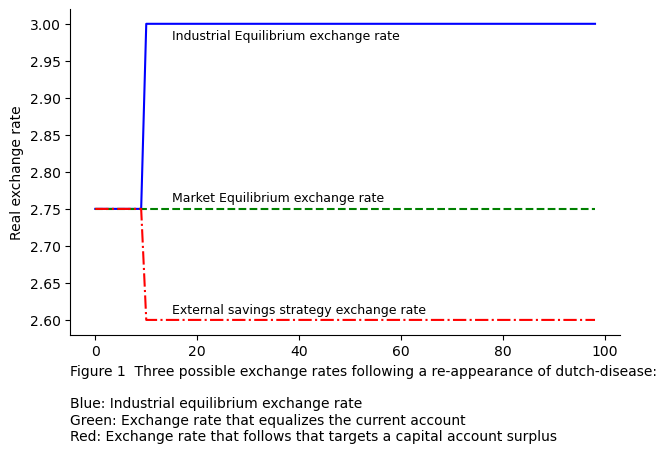

In [7]:
%matplotlib inline 
caption = '''Figure 1  Three possible exchange rates following a re-appearance of dutch-disease:

Blue: Industrial equilibrium exchange rate
Green: Exchange rate that equalizes the current account
Red: Exchange rate that follows that targets a capital account surplus
'''

neutralized_data = list()
dutch_data = list()
ext_savings_data = list()
for i in range(1, 100):
    neutralized_data.append(neutralized.solutions[i]['q'])
    dutch_data.append(dutch.solutions[i]['q'])
    ext_savings_data.append(ext_savings.solutions[i]['q'])
    

fig, axes = plt.subplots(1,1)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.set_xlabel(caption, wrap=True, loc="left")
axes.set_ylabel("Real exchange rate")
# axes.set_title("Paths of the real exchange rate", loc="left", size=16)


axes.plot(neutralized_data, linestyle='-', color='b')
axes.plot(dutch_data, linestyle='--', color='g')
axes.plot(ext_savings_data, linestyle='-.', color='r')

fig.tight_layout()

# add labels
axes.text(15, 2.98, 'Industrial Equilibrium exchange rate', size=9)
axes.text(15, 2.76, 'Market Equilibrium exchange rate', size=9)
axes.text(15, 2.61, 'External savings strategy exchange rate', size=9)

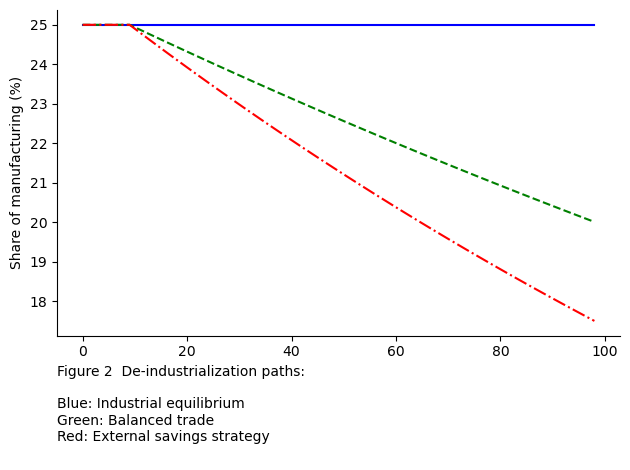

In [8]:
%matplotlib inline 
caption = '''Figure 2  De-industrialization paths:

Blue: Industrial equilibrium
Green: Balanced trade
Red: External savings strategy
'''

neutralized_data = list()
dutch_data = list()
ext_savings_data = list()
for i in range(1, 100):
    neutralized_data.append(neutralized.solutions[i]['gamma']*100)
    dutch_data.append(dutch.solutions[i]['gamma']*100)
    ext_savings_data.append(ext_savings.solutions[i]['gamma']*100)
    

fig, axes = plt.subplots(1,1)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.set_xlabel(caption, wrap=True, loc="left")
axes.set_ylabel("Share of manufacturing (%)", wrap=True)


axes.plot(neutralized_data, linestyle='-', color='b')
axes.plot(dutch_data, linestyle='--', color='g')
axes.plot(ext_savings_data, linestyle='-.', color='r')

fig.tight_layout()

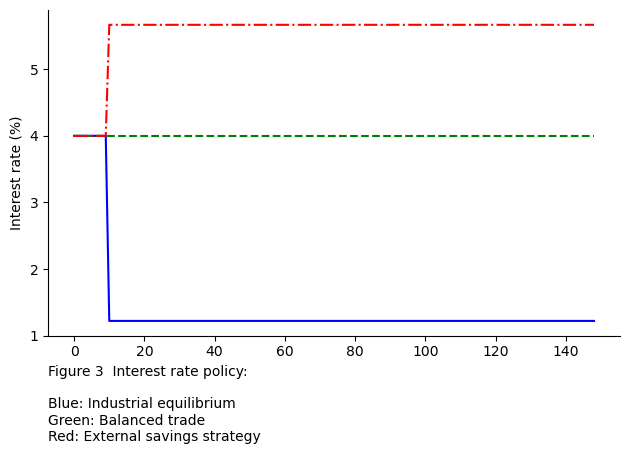

In [9]:
%matplotlib inline 
caption = '''Figure 3  Interest rate policy:

Blue: Industrial equilibrium
Green: Balanced trade
Red: External savings strategy
'''

neutralized_data = list()
dutch_data = list()
ext_savings_data = list()
for i in range(1, 150):
    neutralized_data.append(neutralized.solutions[i]['i']*100)
    dutch_data.append(dutch.solutions[i]['i']*100)
    ext_savings_data.append(ext_savings.solutions[i]['i']*100)
    

fig, axes = plt.subplots(1,1)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.set_xlabel(caption, wrap=True, loc="left")
axes.set_ylabel("Interest rate (%)", wrap=True)


axes.plot(neutralized_data, linestyle='-', color='b')
axes.plot(dutch_data, linestyle='--', color='g')
axes.plot(ext_savings_data, linestyle='-.', color='r')

fig.tight_layout()

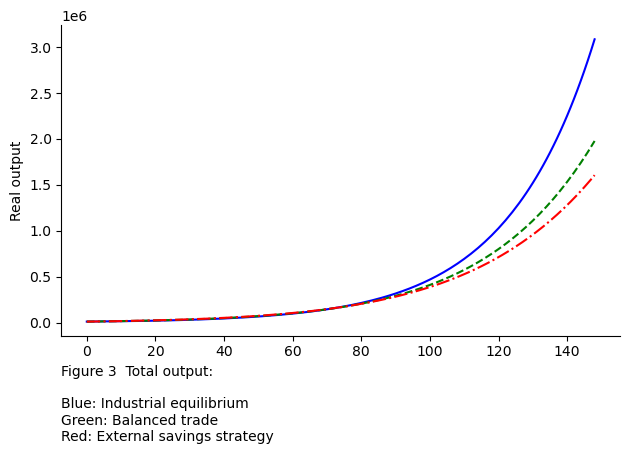

In [10]:
%matplotlib inline 
caption = '''Figure 3  Total output:

Blue: Industrial equilibrium
Green: Balanced trade
Red: External savings strategy
'''

neutralized_data = list()
dutch_data = list()
ext_savings_data = list()
for i in range(1, 150):
    neutralized_data.append(neutralized.solutions[i]['Y']*100)
    dutch_data.append(dutch.solutions[i]['Y']*100)
    ext_savings_data.append(ext_savings.solutions[i]['Y']*100)
    

fig, axes = plt.subplots(1,1)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.set_xlabel(caption, wrap=True, loc="left")
axes.set_ylabel("Real output", wrap=True)


axes.plot(neutralized_data, linestyle='-', color='b')
axes.plot(dutch_data, linestyle='--', color='g')
axes.plot(ext_savings_data, linestyle='-.', color='r')

fig.tight_layout()

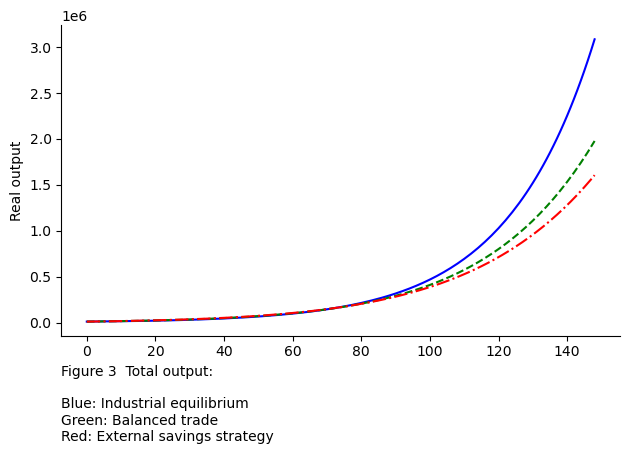

In [11]:
%matplotlib inline 
caption = '''Figure 3  Total output:

Blue: Industrial equilibrium
Green: Balanced trade
Red: External savings strategy
'''

neutralized_data = list()
dutch_data = list()
ext_savings_data = list()
for i in range(1, 150):
    neutralized_data.append(neutralized.solutions[i]['Y']*100)
    dutch_data.append(dutch.solutions[i]['Y']*100)
    ext_savings_data.append(ext_savings.solutions[i]['Y']*100)
    

fig, axes = plt.subplots(1,1)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.set_xlabel(caption, wrap=True, loc="left")
axes.set_ylabel("Real output", wrap=True)

axes.plot(neutralized_data, linestyle='-', color='b')
axes.plot(dutch_data, linestyle='--', color='g')
axes.plot(ext_savings_data, linestyle='-.', color='r')

fig.tight_layout()

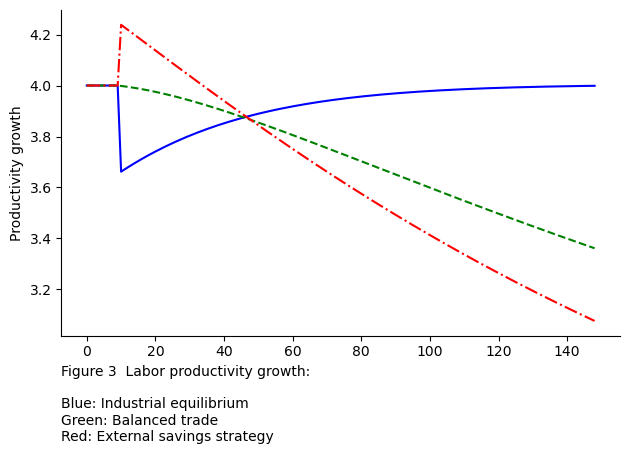

In [12]:
%matplotlib inline 
caption = '''Figure 3  Labor productivity growth:

Blue: Industrial equilibrium
Green: Balanced trade
Red: External savings strategy
'''

neutralized_data = list()
dutch_data = list()
ext_savings_data = list()
for i in range(1, 150):
    neutralized_data.append(neutralized.solutions[i]['gy']*100)
    dutch_data.append(dutch.solutions[i]['gy']*100)
    ext_savings_data.append(ext_savings.solutions[i]['gy']*100)
    

fig, axes = plt.subplots(1,1)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.set_xlabel(caption, wrap=True, loc="left")
axes.set_ylabel("Productivity growth", wrap=True)


axes.plot(neutralized_data, linestyle='-', color='b')
axes.plot(dutch_data, linestyle='--', color='g')
axes.plot(ext_savings_data, linestyle='-.', color='r')

fig.tight_layout()

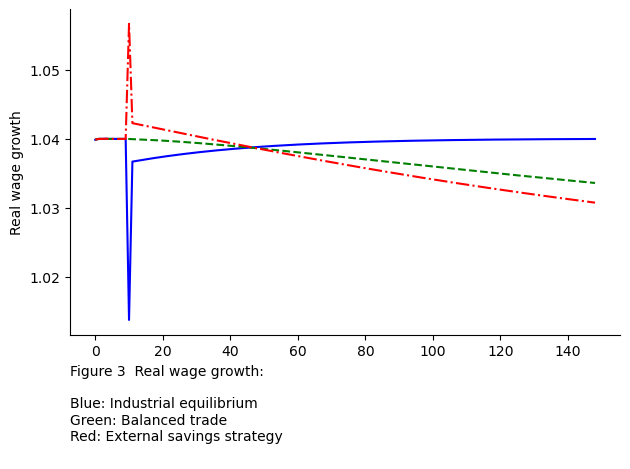

In [13]:
%matplotlib inline 
caption = '''Figure 3  Real wage growth:

Blue: Industrial equilibrium
Green: Balanced trade
Red: External savings strategy
'''

neutralized_data = list()
dutch_data = list()
ext_savings_data = list()
for i in range(1, 150):
    neutralized_data.append((1+neutralized.solutions[i]['gw'])/(1+neutralized.solutions[i]['gp']))
    dutch_data.append((1+dutch.solutions[i]['gw'])/(1+dutch.solutions[i]['gp']))
    ext_savings_data.append((1+ext_savings.solutions[i]['gw'])/(1+ext_savings.solutions[i]['gp']))
    

fig, axes = plt.subplots(1,1)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.set_xlabel(caption, wrap=True, loc="left")
axes.set_ylabel("Real wage growth", wrap=True)


axes.plot(neutralized_data, linestyle='-', color='b')
axes.plot(dutch_data, linestyle='--', color='g')
axes.plot(ext_savings_data, linestyle='-.', color='r')

fig.tight_layout()

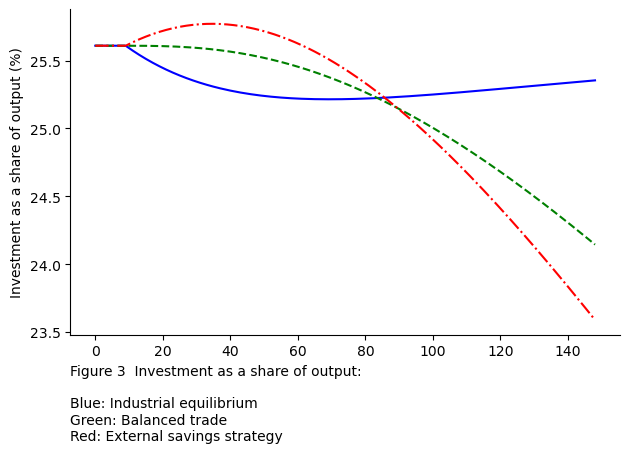

In [14]:
%matplotlib inline 
caption = '''Figure 3  Investment as a share of output:

Blue: Industrial equilibrium
Green: Balanced trade
Red: External savings strategy
'''

neutralized_data = list()
dutch_data = list()
ext_savings_data = list()
for i in range(1, 150):
    neutralized_data.append(neutralized.solutions[i]['h']*100)
    dutch_data.append(dutch.solutions[i]['h']*100)
    ext_savings_data.append(ext_savings.solutions[i]['h']*100)
    

fig, axes = plt.subplots(1,1)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.set_xlabel(caption, wrap=True, loc="left")
axes.set_ylabel("Investment as a share of output (%)", wrap=True)


axes.plot(neutralized_data, linestyle='-', color='b')
axes.plot(dutch_data, linestyle='--', color='g')
axes.plot(ext_savings_data, linestyle='-.', color='r')

fig.tight_layout()